In [1]:
import tensorflow as tf

In [2]:
print(tf.reduce_sum(tf.random.normal([1000, 1000])))

tf.Tensor(-1921.1553, shape=(), dtype=float32)


In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [5]:
tf.reduce_sum(tf.random.normal([1000, 1000]))

<tf.Tensor: shape=(), dtype=float32, numpy=1476.5757>

In [6]:
#!git clone https://github.com/rslim087a/track

In [7]:
# !pip install imgaug

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense, Conv2D
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
#from imgaug import augmenters as iaa
import cv2
import pandas as pd
import ntpath
import random

In [9]:
datadir = 'track'
columns = ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed']
data = pd.read_csv(os.path.join(datadir, 'driving_log.csv'), names = columns)
pd.set_option('display.max_colwidth', None)
data.head()

center  \
0  C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_382.jpg   
1  C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_670.jpg   
2  C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_724.jpg   
3  C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_792.jpg   
4  C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_860.jpg   

                                                                   left  \
0  C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_382.jpg   
1  C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_670.jpg   
2  C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_724.jpg   
3  C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_792.jpg   
4  C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_860.jpg   

                                                                   right  \
0  C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_382.jpg   
1  C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_670.jpg   
2  C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_724.jpg   
3  C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_792.jpg   
4  C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_860.jpg   

   steering  throttle  reverse     speed  
0       0.0       0.0      0.0  0.649786  
1       0.0       0.0      0.0  0.627942  
2       0.0       0.0      0.0  0.622910  
3       0.0       0.0      0.0  0.619162  
4       0.0       0.0      0.0  0.615438

In [10]:
def path_leaf(path):
   head, tail = ntpath.split(path)
   return tail
data['center'] = data['center'].apply(path_leaf)
data['left'] = data['left'].apply(path_leaf)
data['right'] = data['right'].apply(path_leaf)
data.head()

center                              left  \
0  center_2018_07_16_17_11_43_382.jpg  left_2018_07_16_17_11_43_382.jpg   
1  center_2018_07_16_17_11_43_670.jpg  left_2018_07_16_17_11_43_670.jpg   
2  center_2018_07_16_17_11_43_724.jpg  left_2018_07_16_17_11_43_724.jpg   
3  center_2018_07_16_17_11_43_792.jpg  left_2018_07_16_17_11_43_792.jpg   
4  center_2018_07_16_17_11_43_860.jpg  left_2018_07_16_17_11_43_860.jpg   

                               right  steering  throttle  reverse     speed  
0  right_2018_07_16_17_11_43_382.jpg       0.0       0.0      0.0  0.649786  
1  right_2018_07_16_17_11_43_670.jpg       0.0       0.0      0.0  0.627942  
2  right_2018_07_16_17_11_43_724.jpg       0.0       0.0      0.0  0.622910  
3  right_2018_07_16_17_11_43_792.jpg       0.0       0.0      0.0  0.619162  
4  right_2018_07_16_17_11_43_860.jpg       0.0       0.0      0.0  0.615438

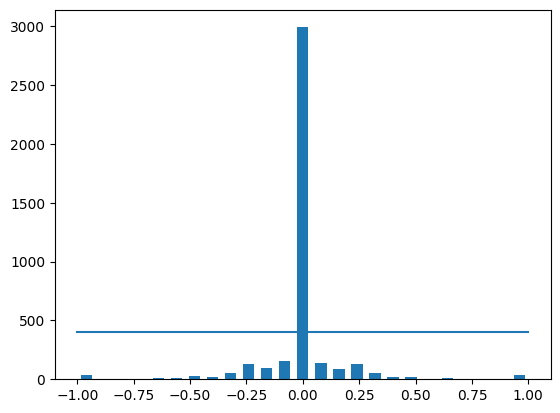

In [11]:
num_bins = 25
samples_per_bin = 400
hist, bins = np.histogram(data['steering'], num_bins)
center = (bins[:-1]+ bins[1:]) * 0.5
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))
# plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, 700))

In [12]:
# num_bins = 25
# samples_per_bin = 400
# hist, bins = np.histogram(data['steering'], num_bins)
# np.max(data['steering'])

In [13]:
# hist, bins = np.histogram(data['steering'], 10)
# print(bins)
# print(bins[1:])
# print(bins[:-1])

In [14]:
# hist, bins = np.histogram(data['steering'], 10)
# bins[1:]
# # center = (bins[:-1]+ bins[1:]) * 0.5
# # plt.bar(center, hist, width=0.1)

In [15]:
# ((-1) + (-0.8))*0.5

In [16]:
print(data.shape)

(4053, 7)


In [17]:
remove_list = []
for j in range(num_bins):
  list_ = []
  for i in range(len(data['steering'])):
    if data['steering'][i] >= bins[j] and data['steering'][i] <= bins[j+1]:
      list_.append(i)
  list_ = shuffle(list_)
  list_ = list_[samples_per_bin:]
  remove_list.extend(list_)

print('removed:', len(remove_list))
data.drop(data.index[remove_list], inplace=True)
print('remaining:', len(data))

removed: 2590
remaining: 1463


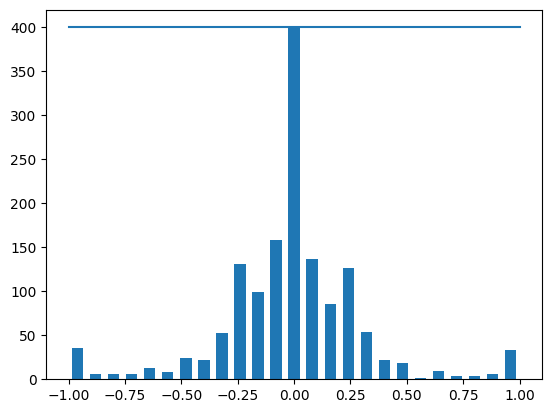

In [18]:
hist, _ = np.histogram(data['steering'], num_bins)
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))

In [19]:
def load_img_steering(datadir, df):
  image_path = []
  steering = []
  for i in range(len(data)):
    indexed_data = data.iloc[i]
    center, left, right = indexed_data[0], indexed_data[1], indexed_data[2]
    image_path.append(os.path.join(datadir, center.strip()))
    steering.append(float(indexed_data[3]))
    # left image append
    image_path.append(os.path.join(datadir,left.strip()))
    steering.append(float(indexed_data[3])+0.15)
    # right image append
    image_path.append(os.path.join(datadir,right.strip()))
    steering.append(float(indexed_data[3])-0.15)
  image_paths = np.asarray(image_path)
  steerings = np.asarray(steering)
  return image_paths, steerings

In [20]:
indexed_data = data.iloc[3]
indexed_data

center      center_2018_07_16_17_11_44_485.jpg
left          left_2018_07_16_17_11_44_485.jpg
right        right_2018_07_16_17_11_44_485.jpg
steering                                 -0.25
throttle                              0.863326
reverse                                    0.0
speed                                 2.173052
Name: 13, dtype: object

In [21]:
center, left, right = indexed_data[0], indexed_data[1], indexed_data[2]
center

C:\Users\PCAdmin\AppData\Local\Temp\ipykernel_26704\2146702155.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  center, left, right = indexed_data[0], indexed_data[1], indexed_data[2]


'center_2018_07_16_17_11_44_485.jpg'

In [22]:
center.strip()

'center_2018_07_16_17_11_44_485.jpg'

In [23]:
image_paths, steerings = load_img_steering(datadir + '/IMG', data)

C:\Users\PCAdmin\AppData\Local\Temp\ipykernel_26704\2267315553.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  center, left, right = indexed_data[0], indexed_data[1], indexed_data[2]
C:\Users\PCAdmin\AppData\Local\Temp\ipykernel_26704\2267315553.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  steering.append(float(indexed_data[3]))
C:\Users\PCAdmin\AppData\Local\Temp\ipykernel_26704\2267315553.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, 

In [24]:
len(image_paths)

4389

In [25]:
X_train, X_valid, y_train, y_valid = train_test_split(image_paths, steerings, test_size=0.2, random_state=6)
print('Training Samples: {}\nValidation Samples: {}'.format(len(X_train), len(X_valid)))

Training Samples: 3511
Validation Samples: 878


Text(0.5, 1.0, 'Validation set')

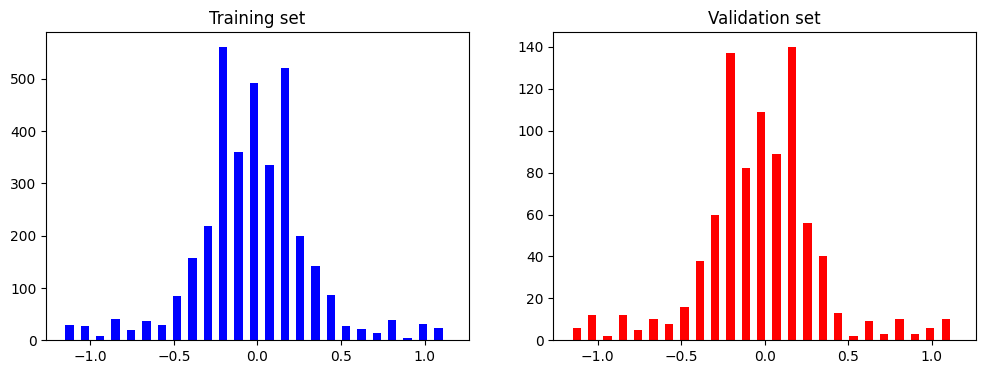

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(y_train, bins=num_bins, width=0.05, color='blue')
axes[0].set_title('Training set')
axes[1].hist(y_valid, bins=num_bins, width=0.05, color='red')
axes[1].set_title('Validation set')

In [27]:
# from imgaug import augmenters as iaa

In [28]:
# def zoom(image):
#   zoom = iaa.Affine(scale=(1, 1.3))
#   image = zoom.augment_image(image)
#   return image
# image = image_paths[random.randint(0, 1000)]
# original_image = mpimg.imread(image)
# zoomed_image = zoom(original_image)

# fig, axs = plt.subplots(1, 2, figsize=(15, 10))
# fig.tight_layout()

# axs[0].imshow(original_image)
# axs[0].set_title('Original Image')

# axs[1].imshow(zoomed_image)
# axs[1].set_title('Zoomed Image')

In [29]:
#pip install albumentations

c:\Users\PCAdmin\miniconda3\envs\s_d_c\lib\site-packages\albumentations\core\validation.py:114: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)


Text(0.5, 1.0, 'Augmented Image\nSteering Angle: 0.15')

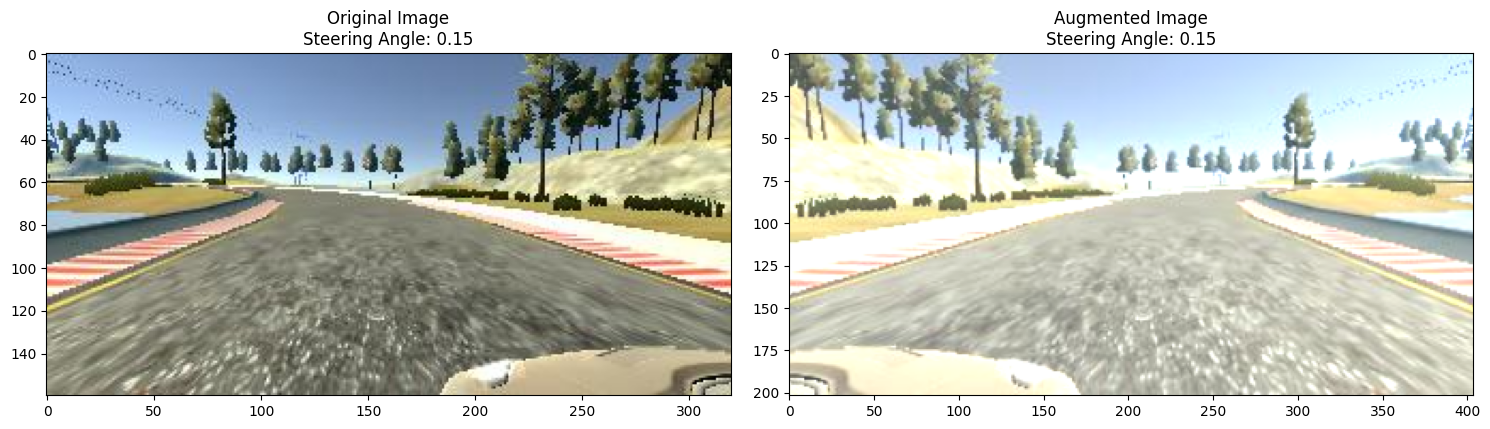

In [30]:
import albumentations as A

# Define the composed transformation
transform = A.Compose([
    A.RandomScale(scale_limit=0.3, p=0.5),                 # Zoom
    A.ShiftScaleRotate(shift_limit=0.1, rotate_limit=0, scale_limit=0, p=0.5),  # Pan
    A.RandomBrightnessContrast(brightness_limit=0.5, contrast_limit=0.2, p=0.5),  # Brightness
    A.HorizontalFlip(p=0.5)                                # Flip
])

# Apply transform to a random image
random_index = random.randint(0, 1000)
image = cv2.imread(image_paths[random_index])             # Read with OpenCV
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)            # Convert BGR to RGB
steering_angle = steerings[random_index]

augmented = transform(image=image)
augmented_image = augmented['image']
flipped = transform.transforms[-1]                        # Last transform is flip

if flipped.p > 0.5:  # If flipped, reverse angle (Albumentations doesn’t flip angle automatically)
    steering_angle = -steering_angle

# Plot original and augmented
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(image)
axs[0].set_title(f'Original Image\nSteering Angle: {steering_angle}')

axs[1].imshow(augmented_image)
axs[1].set_title(f'Augmented Image\nSteering Angle: {steering_angle}')

In [31]:
def random_augment(image, steering_angle):
    """
    Apply random augmentation to the image and steering angle.
    Includes zoom, pan, brightness, and horizontal flip.
    """

    transform = A.Compose([
    A.RandomScale(scale_limit=0.3, p=0.5),                 # Zoom
    A.ShiftScaleRotate(shift_limit=0.1, rotate_limit=0, scale_limit=0, p=0.5),  # Pan
    A.RandomBrightnessContrast(brightness_limit=0.5, contrast_limit=0.2, p=0.5),  # Brightness
    A.HorizontalFlip(p=0.5)                                # Flip
    ])

    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  # Albumentations expects BGR input
    augmented = transform(image=image)
    aug_image = augmented['image']

    # Check if image was flipped by sampling a coin flip (Albumentations doesn't track it)
    if transform.transforms[-1].p > 0.5 and np.random.rand() < 0.5:
        steering_angle = -steering_angle

    aug_image = cv2.cvtColor(aug_image, cv2.COLOR_BGR2RGB)  # Convert back to RGB
    return aug_image, steering_angle

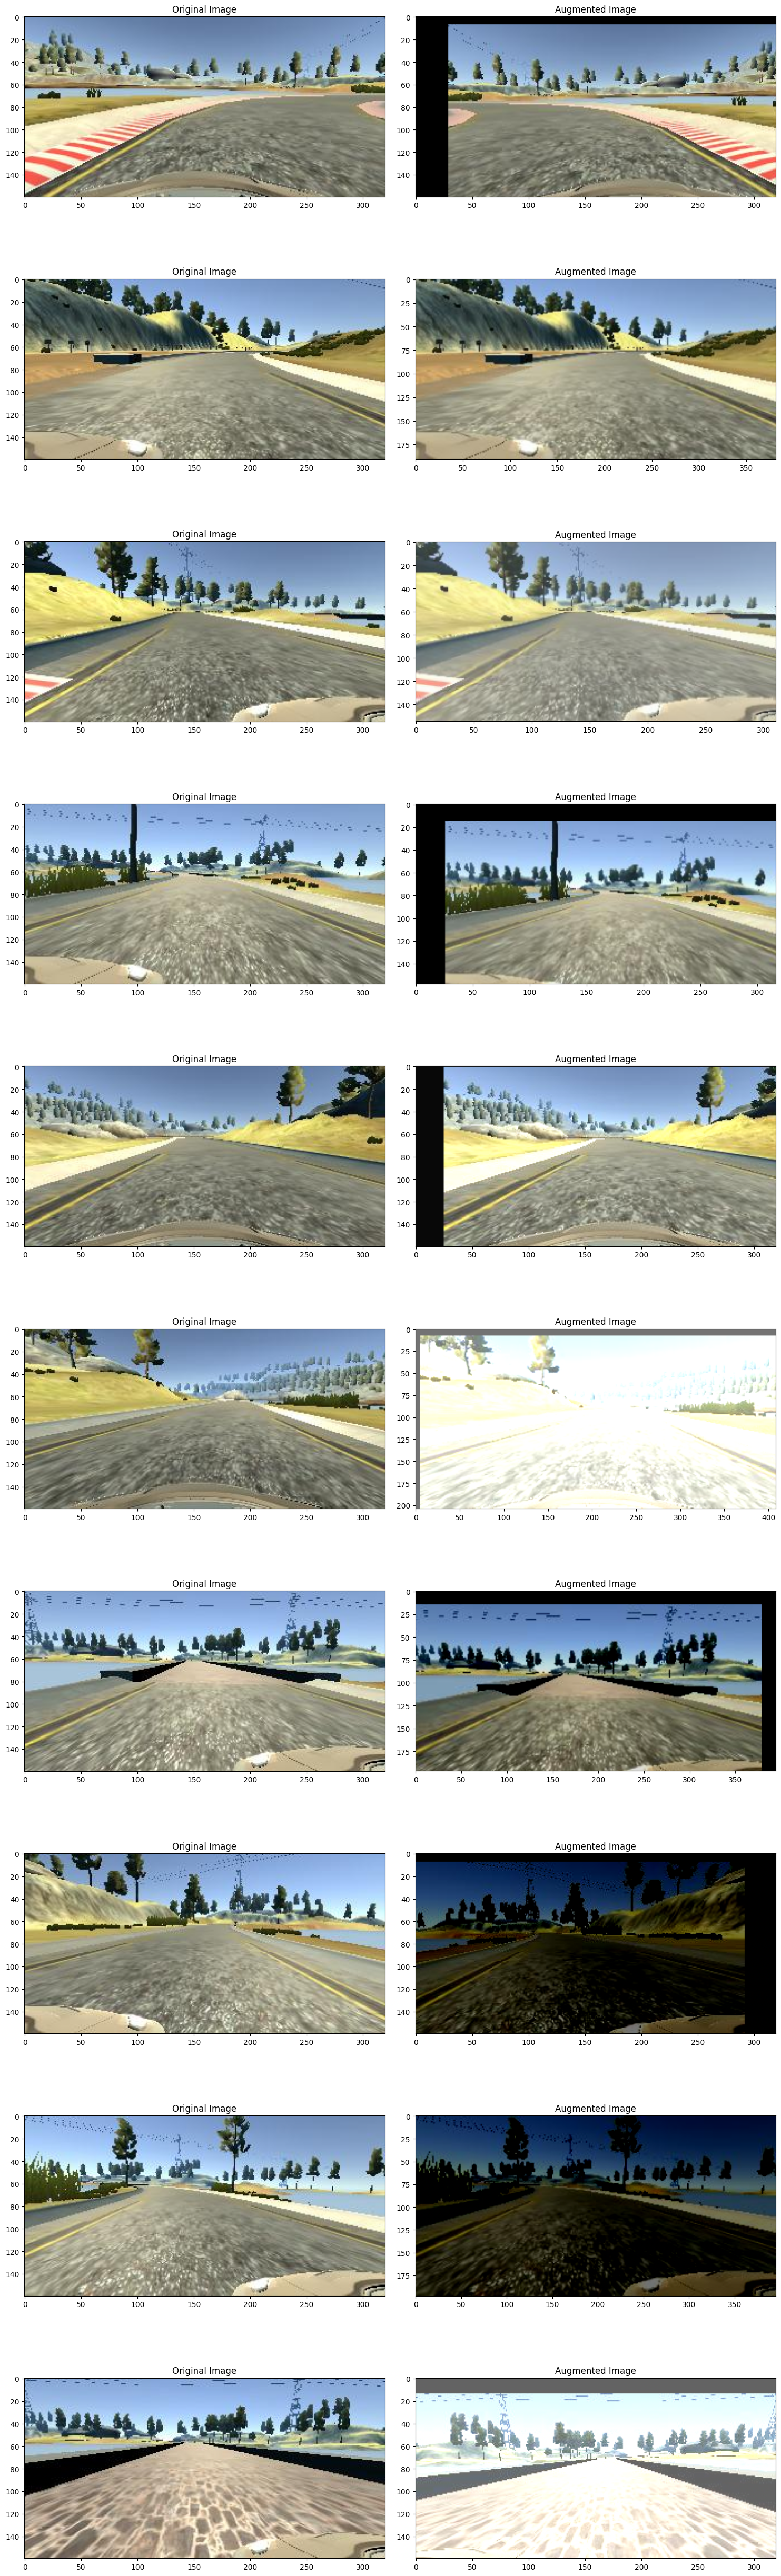

In [32]:
ncol = 2
nrow = 10

fig, axs = plt.subplots(nrow, ncol, figsize=(15, 50))
fig.tight_layout()

for i in range(10):
    randnum = random.randint(0, len(image_paths) - 1)
    random_image_path = image_paths[randnum]
    random_steering = steerings[randnum]

    original_image = mpimg.imread(random_image_path)  # Load image
    augmented_image, steering = random_augment(original_image, random_steering)  # Use image array

    axs[i][0].imshow(original_image)
    axs[i][0].set_title("Original Image")

    axs[i][1].imshow(augmented_image)
    axs[i][1].set_title("Augmented Image")

In [33]:
def img_preprocess(img):
    """
    Preprocess the input image:
    - Crop road and sky
    - Convert to YUV
    - Apply Gaussian blur
    - Resize to 200x66
    - Normalize pixel values
    """
    img = img[60:135, :, :]  # Crop top and bottom (sky and car front)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)  # Convert color space
    img = cv2.GaussianBlur(img, (3, 3), 0)      # Apply Gaussian Blur
    img = cv2.resize(img, (200, 66))            # Resize to NVIDIA model input shape
    img = img / 255.0                           # Normalize to [0, 1]
    return img

Text(0.5, 1.0, 'Preprocessed Image')

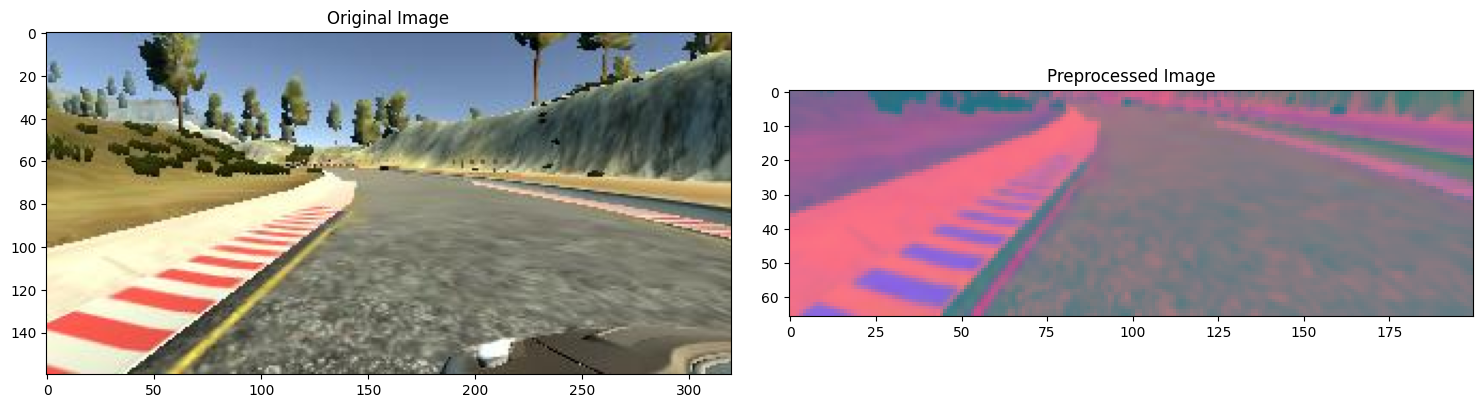

In [34]:
image = image_paths[100]
original_image = mpimg.imread(image)
preprocessed_image = img_preprocess(original_image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
axs[1].imshow(preprocessed_image)
axs[1].set_title('Preprocessed Image')

In [35]:
!nvidia-smi

Sat Jul 12 08:14:00 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 576.80                 Driver Version: 576.80         CUDA Version: 12.9     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce MX330         WDDM  |   00000000:2C:00.0 Off |                  N/A |
| N/A   65C    P5            N/A  / 5001W |    1705MiB /   2048MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [36]:
def batch_generator(image_paths, steering_ang, batch_size, istraining):
    while True:
        batch_img = []
        batch_steering = []

        for i in range(batch_size):
            random_index = random.randint(0, len(image_paths) - 1)
            steering = steering_ang[random_index]
            img_path = image_paths[random_index]
            img = mpimg.imread(img_path)

            if istraining:
                img, steering = random_augment(img, steering)

            img = img_preprocess(img)
            batch_img.append(img)
            batch_steering.append(steering)

        yield (np.asarray(batch_img), np.asarray(batch_steering))

In [37]:
x_train_gen, y_train_gen = next(batch_generator(X_train, y_train, 1, 1))
x_valid_gen, y_valid_gen = next(batch_generator(X_valid, y_valid, 1, 0))

Text(0.5, 1.0, 'Validation Image')

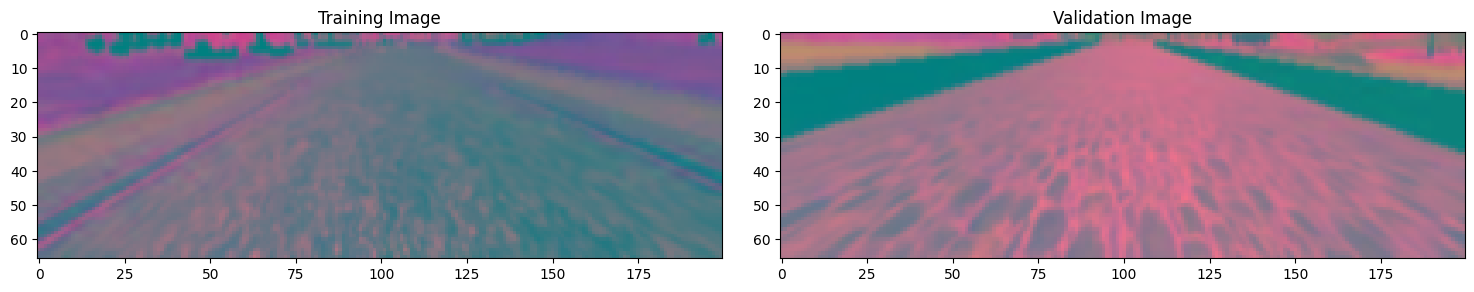

In [38]:
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(x_train_gen[0])
axs[0].set_title('Training Image')

axs[1].imshow(x_valid_gen[0])
axs[1].set_title('Validation Image')

In [39]:
def nvidia_model():
  model = Sequential()
  model.add(Conv2D(24, (5, 5), strides=(2, 2), input_shape=(66, 200, 3), activation='elu'))
  model.add(Conv2D(36, (5, 5), strides=(2, 2), activation='elu'))
  model.add(Conv2D(48, (5, 5), strides=(2, 2), activation='elu'))
  model.add(Conv2D(64, (5, 5), activation='elu'))
  # model.add(Conv2D(64, (3,3), activation='elu'))
#   model.add(Dropout(0.5))


  model.add(Flatten())

  model.add(Dense(100, activation = 'elu'))
#   model.add(Dropout(0.5))

  model.add(Dense(50, activation = 'elu'))
#   model.add(Dropout(0.5))

  model.add(Dense(10, activation = 'elu'))
#   model.add(Dropout(0.5))

  model.add(Dense(1))

  optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
  model.compile(loss='mse', optimizer=optimizer)
  return model

model = nvidia_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 31, 98, 24)        1824      
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 47, 36)        21636     
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 22, 48)         43248     
                                                                 
 conv2d_3 (Conv2D)           (None, 1, 18, 64)         76864     
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                                 
 dense (Dense)               (None, 100)               115300    
                                                                 
 dense_1 (Dense)             (None, 50)                5

In [41]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [42]:
history = model.fit(
    batch_generator(X_train, y_train, 100, 1),
    steps_per_epoch=300,
    epochs=50,
    validation_data=batch_generator(X_valid, y_valid, 100, 0),
    validation_steps=200,
    verbose=1,
    shuffle=True
)

Epoch 1/50
300/300 [==============================] - 633s 2s/step - loss: 0.1135 - val_loss: 0.1184
Epoch 2/50
300/300 [==============================] - 637s 2s/step - loss: 0.1097 - val_loss: 0.1031
Epoch 3/50
300/300 [==============================] - 493s 2s/step - loss: 0.1037 - val_loss: 0.1005
Epoch 4/50
300/300 [==============================] - 460s 2s/step - loss: 0.1005 - val_loss: 0.0974
Epoch 5/50
300/300 [==============================] - 454s 2s/step - loss: 0.0941 - val_loss: 0.0605
Epoch 6/50
300/300 [==============================] - 369s 1s/step - loss: 0.0886 - val_loss: 0.0743
Epoch 7/50
300/300 [==============================] - 328s 1s/step - loss: 0.0817 - val_loss: 0.0561
Epoch 8/50
300/300 [==============================] - 286s 957ms/step - loss: 0.0764 - val_loss: 0.0494
Epoch 9/50
300/300 [==============================] - 288s 962ms/step - loss: 0.0691 - val_loss: 0.0468
Epoch 10/50
300/300 [==============================] - 273s 912ms/step - loss: 0.0701

Text(0.5, 0, 'Epoch')

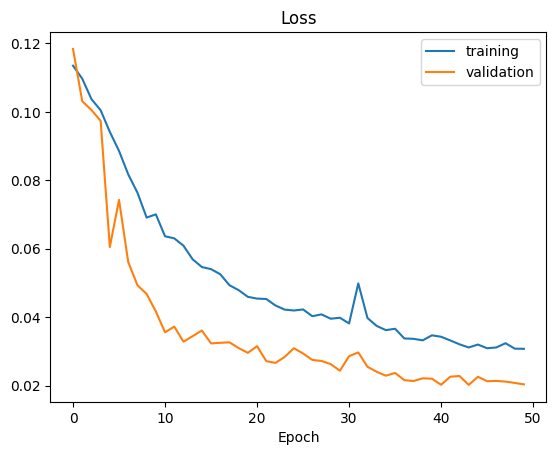

In [43]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('Epoch')

In [44]:
# model.save('model.h5')
model.save('my_model.keras')